# DATA PREPARATION

In [179]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.optimize import minimize
import cvxpy as cp

In [58]:
# S&P500 for market return
# USTB for risk free rate

#for individual stocks ... focus in information, technology, and finance related firms

techfirms = ["^GSPC", "^IRX", "ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ANET", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPE", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KEYS", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC", "QRVO", "QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SEDG", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN"]
finfirms = ["AFL", "ALL", "AXP", "AIG", "AMP", "AON", "ACGL", "AJG", "AIZ", "BAC", "WRB", "BRK.B", "BLK", "BX", "BK", "BRO", "COF", "CBOE", "SCHW", "CB", "CINF", "C", "CFG", "CME", "CMA", "DFS", "EG", "FDS", "FITB", "FIS", "FI", "FLT", "BEN", "GL", "GPN", "GS", "HIG", "HBAN", "ICE", "IVZ", "JKHY", "JPM", "KEY", "L", "MTB", "MKTX", "MMC", "MA", "MET", "MCO", "MS", "MSCI", "NDAQ", "NTRS", "PYPL", "PNC", "PFG", "PGR", "PRU", "RJF", "RF", "SPGI", "STT", "SYF", "TROW", "TRV", "TFC", "USB", "V", "WFC", "WTW", "ZION"]


In [59]:
stock_symbols = techfirms

# Define the date range for the past 10 years
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(years=10)

# Create an empty DataFrame to store the data
tech = pd.DataFrame()

# Loop through each stock symbol and fetch the data
for symbol in stock_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')
    stock_data['Symbol'] = symbol  # Add a 'Symbol' column to identify the stock
    tech = tech.append(stock_data)

# Print the first few rows of the combined data
print(tech.head())

[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)



[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)



[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)



[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)



[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-11-01  1758.699951  1813.550049  1746.199951  1805.810059  1805.810059   
2013-12-01  1806.550049  1849.439941  1767.989990  1848.359985  1848.359985   
2014-01-01  1845.859985  1850.839966  1770.449951  1782.589966  1782.589966   
2014-02-01  1782.680054  1867.920044  1737.920044  1859.449951  1859.449951   
2014-03-01  1857.680054  1883.969971  1834.439941  1872.339966  1872.339966   

                 Volume Symbol  
Date                            
2013-11-01  63628190000  ^GSPC  
2013-12-01  64958820000  ^GSPC  
2014-01-01  75871910000  ^GSPC  
2014-02-01  69725590000  ^GSPC  
2014-03-01  71885030000  ^GSPC  


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/1165779273.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tech = tech.append(stock_data)


In [52]:
stock_symbols = finfirms

# Define the date range for the past 10 years
end_date = pd.to_datetime('today')
start_date = end_date - pd.DateOffset(years=10)

# Create an empty DataFrame to store the data
fin = pd.DataFrame()

# Loop through each stock symbol and fetch the data
for symbol in stock_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')
    stock_data['Symbol'] = symbol  # Add a 'Symbol' column to identify the stock
    fin = fin.append(stock_data)

# Print the first few rows of the combined data
print(fin.head())

[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)

1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)



[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)
/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close      Volume  \
Date                                                                            
2013-11-01  32.584999  33.759998  32.110001  33.185001  26.056072  74209600.0   
2013-12-01  33.174999  33.810001  32.564999  33.400002  26.369471  79074000.0   
2014-01-01  33.314999  33.345001  30.670000  31.389999  24.782564  89773400.0   
2014-02-01  31.430000  32.240002  30.225000  32.040001  25.295738  74859200.0   
2014-03-01  31.684999  33.005001  31.049999  31.520000  25.033607  78084800.0   

           Symbol  
Date               
2013-11-01    AFL  
2013-12-01    AFL  
2014-01-01    AFL  
2014-02-01    AFL  
2014-03-01    AFL  


/var/folders/08/4wqyr2qx2dv7vmb5bnpssk480000gn/T/ipykernel_26863/191142716.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fin = fin.append(stock_data)


In [61]:
allstock = pd.concat([tech, fin])

In [78]:
allstock['Log Returns'] = np.log(allstock['Adj Close'] / allstock['Adj Close'].shift(1))


In [79]:
lnreturn = allstock[["Log Returns", "Symbol"]]

In [80]:
# Function to break down a DataFrame based on the "Symbol" column
def split_dataframe_by_symbol(input_df):
    # Group the DataFrame by the "Symbol" column
    grouped = input_df.groupby("Symbol")
    
    # Create a list to store the separate DataFrames
    split_dataframes = []
    
    # Iterate through groups and append them to the list with reset index
    for symbol, group in grouped:
        # Create a new DataFrame with "Price" column and use "Symbol" as the column name
        new_df = group[["Log Returns"]].rename(columns={"Log Returns": symbol})
        new_df.reset_index(drop=True, inplace=True)  # Reset index
        split_dataframes.append(new_df)
    
    return split_dataframes

# Sample DataFrame
data = lnreturn

df = pd.DataFrame(data)

# Call the function to split the DataFrame by "Symbol" and reset row numbers
split_data = split_dataframe_by_symbol(df)

# Join all DataFrames side by side
joined_df = pd.concat(split_data, axis=1)

alldf = joined_df.drop(0)
alldf


,AAPL,ACGL,ACN,ADBE,ADI,ADSk,AFL,AIG,AIZ,AJG,...,V,VRSN,WDC,WFC,WRB,WTW,ZBRA,ZION,^GSPC,^IRX
1,0.014684,0.014513,0.059508,0.053158,0.054678,0.106200,0.011956,0.025795,0.025655,0.008345,...,0.092286,0.050079,0.111604,0.037930,-0.006908,0.000669,0.042302,0.022671,0.023289,0.135802
2,-0.113949,-0.103705,-0.028873,-0.011590,-0.046758,0.018313,-0.062067,-0.060424,-0.015488,-0.007480,...,-0.033100,-0.017380,0.030334,-0.001322,-0.112840,-0.033559,0.016141,-0.041225,-0.036231,-1.840550
3,0.049949,0.042033,0.042523,0.147977,0.051480,0.023717,0.020496,0.037045,0.004275,-0.000649,...,0.047634,-0.063960,0.009471,0.023541,0.062020,-0.045127,0.227356,0.081780,0.042213,1.458615
4,0.025724,0.024988,-0.044528,-0.043022,0.051950,-0.064945,-0.010417,0.004811,-0.006335,0.037296,...,-0.043839,-0.022015,0.054037,0.075803,0.009172,0.069673,0.006069,-0.005781,0.006908,-0.428996
5,0.094761,-0.003831,0.006252,-0.063586,-0.035434,-0.023869,-0.005089,0.062960,0.037022,-0.055306,...,-0.063347,-0.133346,-0.038240,-0.002013,0.063510,-0.066728,0.000432,-0.068808,0.006182,-0.336472
6,0.070195,-0.006827,0.027166,0.045163,0.021029,0.086716,-0.024043,0.017537,0.005916,0.017832,...,0.058564,0.059652,-0.002615,0.022705,0.007432,0.022912,0.067648,-0.011476,0.020812,0.405465
7,0.032856,0.008918,-0.007517,0.114368,0.038758,0.073781,0.022560,0.009388,-0.029831,0.016662,...,-0.017476,-0.025687,0.049413,0.041608,0.038297,0.031913,0.102503,0.031730,0.018879,-0.405465
8,0.028326,-0.071994,-0.019486,-0.043931,-0.085684,-0.055241,-0.041157,-0.046531,-0.033981,-0.027088,...,0.001423,0.101974,0.083449,-0.032092,-0.034969,-0.053770,-0.027713,-0.022303,-0.015195,-0.105361
9,0.069690,0.039077,0.022204,0.037553,0.029580,0.005421,0.024799,0.075564,0.052122,0.048367,...,0.007131,0.054544,0.030756,0.010553,0.080508,0.029499,-0.025808,0.011042,0.036964,0.000000
10,-0.012259,-0.015594,0.003203,-0.038420,-0.032405,0.026855,-0.043881,-0.037068,-0.033275,-0.040399,...,0.005896,-0.034941,-0.056822,0.015293,-0.011440,-0.013674,-0.094836,-0.001343,-0.015635,-0.325422


In [81]:
alldf.describe().transpose()['count']>118 # "ANET", "CFG", "HPE", "KEYS", "PYPL", "QRVO", "SEDG", "SYF"

AAPL      True
ACGL      True
ACN       True
ADBE      True
ADI       True
ADSk      True
AFL       True
AIG       True
AIZ       True
AJG       True
AKAM      True
ALL       True
AMAT      True
AMD       True
AMP       True
AMZN      True
ANET     False
ANSS      True
AON       True
APH       True
AVGO      True
AXP       True
BAC       True
BEN       True
BK        True
BLK       True
BRO       True
BX        True
C         True
CB        True
CBOE      True
CDNS      True
CDW       True
CFG      False
CINF      True
CMA       True
CME       True
COF       True
CRM       True
CSCO      True
CTSH      True
DFS       True
DXC       True
EG        True
ENPH      True
EPAM      True
FDS       True
FFIV      True
FI        True
FICO      True
FIS       True
FITB      True
FLT       True
FSLR      True
FTNT      True
GEN       True
GL        True
GLW       True
GOOGL     True
GPN       True
GS        True
HBAN      True
HIG       True
HPE      False
HPQ       True
IBM       True
ICE       

In [82]:
alldf_ = alldf.drop(["ANET", "CFG", "HPE", "KEYS", "PYPL", "QRVO", "SEDG", "SYF"], axis = 1)

In [83]:
alldf_.describe().transpose()['count']>118

AAPL     True
ACGL     True
ACN      True
ADBE     True
ADI      True
ADSk     True
AFL      True
AIG      True
AIZ      True
AJG      True
AKAM     True
ALL      True
AMAT     True
AMD      True
AMP      True
AMZN     True
ANSS     True
AON      True
APH      True
AVGO     True
AXP      True
BAC      True
BEN      True
BK       True
BLK      True
BRO      True
BX       True
C        True
CB       True
CBOE     True
CDNS     True
CDW      True
CINF     True
CMA      True
CME      True
COF      True
CRM      True
CSCO     True
CTSH     True
DFS      True
DXC      True
EG       True
ENPH     True
EPAM     True
FDS      True
FFIV     True
FI       True
FICO     True
FIS      True
FITB     True
FLT      True
FSLR     True
FTNT     True
GEN      True
GL       True
GLW      True
GOOGL    True
GPN      True
GS       True
HBAN     True
HIG      True
HPQ      True
IBM      True
ICE      True
INTC     True
INTU     True
IT       True
IVZ      True
JKHY     True
JNPR     True
JPM      True
KEY   

In [86]:
Rf = np.mean(alldf_["^IRX"])
Rf

0.03841138757754643

# Regression (CAPM beta, MLR)
### stock return - risk free return = alpha + beta*(market return - risk free return)
### S&P = constant + coefficients*stocks

In [111]:
#used data
other = ["^GSPC", "^IRX"]
techstock = ["ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC","QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN"]
finstock = ["AFL", "ALL", "AXP", "AIG", "AMP", "AON", "ACGL", "AJG", "AIZ", "BAC", "WRB", "BLK", "BX", "BK", "BRO", "COF", "CBOE", "SCHW", "CB", "CINF", "C", "CME", "CMA", "DFS", "EG", "FDS", "FITB", "FIS", "FI", "FLT", "BEN", "GL", "GPN", "GS", "HIG", "HBAN", "ICE", "IVZ", "JKHY", "JPM", "KEY", "L", "MTB", "MKTX", "MMC", "MA", "MET", "MCO", "MS", "MSCI", "NDAQ", "NTRS", "PNC", "PFG", "PGR", "PRU", "RJF", "RF", "SPGI", "STT", "TROW", "TRV", "TFC", "USB", "V", "WFC", "WTW", "ZION"]
allasset = techstock+finstock
drop = ["ANET", "CFG", "HPE", "KEYS", "PYPL", "QRVO", "SEDG", "SYF"]

techmean = alldf_[techstock].mean(axis=1)
finmean = alldf_[finstock].mean(axis=1)

alldf_["techmean"] = techmean
alldf_["finmean"] = finmean


In [100]:
import statsmodels.api as sm

META = LinearRegression()
X = alldf_["^GSPC"] - Rf
X = sm.add_constant(X)
y = alldf_["META"] - Rf
#print(X)
#print(y)
META = sm.OLS(y, X).fit()
META.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     31.97
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.13e-07
Time:                        12:08:32   Log-Likelihood:                 122.98
No. Observations:                 119   AIC:                            -242.0
Df Residuals:                     117   BIC:                            -236.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.010      1.006      0.317      -0.010       0.029
^GSPC          1.0444      0.185      5.654      0.000       0.679       1.410
==============================================================================
Omnibus:                       65.662   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.191
Skew:                          -1.763   Prob(JB):                     1.53e-86
Kurtosis:                      11.202   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
NVDA = LinearRegression()
y = alldf_["NVDA"] - Rf
#print(X)
#print(y)
NVDA = sm.OLS(y, X).fit()
NVDA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NVDA   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     66.24
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           4.83e-13
Time:                        12:08:52   Log-Likelihood:                 103.21
No. Observations:                 119   AIC:                            -202.4
Df Residuals:                     117   BIC:                            -196.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0573      0.012      4.939      0.000       0.034       0.080
^GSPC          1.7751      0.218      8.139      0.000       1.343       2.207
==============================================================================
Omnibus:                        5.499   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                6.332
Skew:                           0.264   Prob(JB):                       0.0422
Kurtosis:                       3.999   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
IBM = LinearRegression()
y = alldf_["IBM"] - Rf
#print(X)
#print(y)
IBM = sm.OLS(y, X).fit()
IBM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IBM   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     52.11
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           5.70e-11
Time:                        12:09:14   Log-Likelihood:                 177.98
No. Observations:                 119   AIC:                            -352.0
Df Residuals:                     117   BIC:                            -346.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0104      0.006     -1.689      0.094      -0.023       0.002
^GSPC          0.8399      0.116      7.219      0.000       0.609       1.070
==============================================================================
Omnibus:                       18.405   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.559
Skew:                          -0.754   Prob(JB):                     1.04e-06
Kurtosis:                       4.812   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
MLR = LinearRegression()
X = alldf_[["techmean", "finmean"]]
X = sm.add_constant(X)
y = alldf_["^GSPC"]
#print(X)
#print(y)
MLR = sm.OLS(y, X).fit()
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^GSPC   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     595.6
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           9.78e-62
Time:                        14:52:40   Log-Likelihood:                 349.46
No. Observations:                 119   AIC:                            -692.9
Df Residuals:                     116   BIC:                            -684.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.001     -1.519      0.131      -0.004       0.001
techmean       0.5074      0.032     15.689      0.000       0.443       0.571
finmean        0.2783      0.035      8.058      0.000       0.210       0.347
==============================================================================
Omnibus:                        2.176   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                1.823
Skew:                           0.299   Prob(JB):                        0.402
Kurtosis:                       3.094   Cond. No.                         37.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Hypothesis Testing 
### beta = 1
### F test & t test result (H0: coefficients=0)

In [129]:
import scipy.stats as stats
for model in [META, NVDA, IBM]:
    coefficient_to_test = model.params[1]

    # Define the null hypothesis (H0) and alternative hypothesis (H1)
    null_hypothesis = 1  # Coefficient = 1 under the null hypothesis

    # Compute the standard error of the coefficient estimate
    std_err = model.bse[1]

    # Compute the t-statistic
    t_statistic = (coefficient_to_test - null_hypothesis) / std_err

    # Calculate the degrees of freedom
    df = model.df_resid

    # Calculate the p-value for a one-sided t-test
    p_value = 1 - stats.t.cdf(np.abs(t_statistic), df)

    # Check if the p-value is less than your significance level (e.g., 0.05)
    alpha_levels = [0.01, 0.05, 0.1]

    if model == META:
        print("META")
    elif model == NVDA:
        print("NVDA")
    else:
        print("IBM")
    
    # Print the coefficient and test results for different significance levels
    for alpha in alpha_levels:
        if p_value < alpha:
            print(f"Significance Level: {alpha:.2f} - Reject the null hypothesis. Coefficient ({coefficient_to_test:.4f}) is greater than 1.")
        else:
            print(f"Significance Level: {alpha:.2f} - Fail to reject the null hypothesis. Coefficient ({coefficient_to_test:.4f}) is not greater than 1.")
    # Display the t-statistic and p-value

    print(f"Coefficient: {coefficient_to_test:.4f}")
    print(f"t-statistic: {t_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("\n")
    

META
Significance Level: 0.01 - Fail to reject the null hypothesis. Coefficient (1.0444) is not greater than 1.
Significance Level: 0.05 - Fail to reject the null hypothesis. Coefficient (1.0444) is not greater than 1.
Significance Level: 0.10 - Fail to reject the null hypothesis. Coefficient (1.0444) is not greater than 1.
Coefficient: 1.0444
t-statistic: 0.2403
p-value: 0.4052


NVDA
Significance Level: 0.01 - Reject the null hypothesis. Coefficient (1.7751) is greater than 1.
Significance Level: 0.05 - Reject the null hypothesis. Coefficient (1.7751) is greater than 1.
Significance Level: 0.10 - Reject the null hypothesis. Coefficient (1.7751) is greater than 1.
Coefficient: 1.7751
t-statistic: 3.5537
p-value: 0.0003


IBM
Significance Level: 0.01 - Fail to reject the null hypothesis. Coefficient (0.8399) is not greater than 1.
Significance Level: 0.05 - Fail to reject the null hypothesis. Coefficient (0.8399) is not greater than 1.
Significance Level: 0.10 - Reject the null hypothe

In [ ]:
# F-test and t-test for MLR is given in the regression result

# Assumption Testing

## Homoscedasticity  (Breusch-Pagan)

In [142]:
# breusch-pagan heteroskedasticity test
name = ['Lagrange multiplier statistic', 'p-value',
                'f-value', 'f p-value']
for model in [META, NVDA, IBM, MLR]:
    test = sms.het_breuschpagan(model.resid, model.model.exog)
    if model == META:
        print("META")
    elif model == NVDA:
        print("NVDA")
    elif model == IBM:
        print("IBM")
    else:
        print("MLR")
    print(pd.DataFrame(test, name))
    print("\n")

META
                                      0
Lagrange multiplier statistic  1.466664
p-value                        0.225873
f-value                        1.460009
f p-value                      0.229365


NVDA
                                      0
Lagrange multiplier statistic  4.435801
p-value                        0.035193
f-value                        4.530113
f p-value                      0.035401


IBM
                                      0
Lagrange multiplier statistic  0.450510
p-value                        0.502093
f-value                        0.444622
f p-value                      0.506213


MLR
                                      0
Lagrange multiplier statistic  1.882759
p-value                        0.390089
f-value                        0.932399
f p-value                      0.396538




## No Autocorrelation (Breusch-Godfrey)

In [146]:
name = ['Lagrange multiplier statistic', 'p-value',
                'f-value', 'f p-value']
for model in [META, NVDA, IBM, MLR]:
    test = sms.acorr_breusch_godfrey(model, 10)
    if model == META:
        print("META")
    elif model == NVDA:
        print("NVDA")
    elif model == IBM:
        print("IBM")
    else:
        print("MLR")
    print(pd.DataFrame(test, name))
    print("\n")

META
                                      0
Lagrange multiplier statistic  9.360905
p-value                        0.498229
f-value                        0.913558
f p-value                      0.523680


NVDA
                                      0
Lagrange multiplier statistic  9.085670
p-value                        0.523993
f-value                        0.884477
f p-value                      0.550139


IBM
                                      0
Lagrange multiplier statistic  7.649563
p-value                        0.663024
f-value                        0.735070
f p-value                      0.690007


MLR
                                       0
Lagrange multiplier statistic  12.183958
p-value                         0.272934
f-value                         1.209088
f p-value                       0.293586




## Exogeneity (Wu-Hausman)

In [ ]:
instrument = [] # if I have valid instrument variable, I can test for exogeneity that follows from non-stochastic X. this beyond scope of CH2~CH5, so I'll skip this for now. 

# Add a constant to the X variable (for the intercept)
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Fit an IV regression model using the instrument
iv_model = IV2SLS(y, X, instrument).fit()

# Perform the Wu-Hausman test for exogeneity
wu_hausman_test = iv_model.wu_hausman()

# Display the test result
print("Wu-Hausman Test:")
print(wu_hausman_test)

## Normality (Jarque-Bera)

In [ ]:
# test result is show in the regression result

## Linearity (RESET)

In [149]:
from statsmodels.stats.outliers_influence import reset_ramsey

In [157]:
for model in [META, NVDA, IBM, MLR]:
    if model == META:
        print("META")
    elif model == NVDA:
        print("NVDA")
    elif model == IBM:
        print("IBM")
    else:
        print("MLR")
    print(reset_ramsey(model,degree=4))
    print("\n")

META
<F test: F=0.26804950278119544, p=0.8483125385819835, df_denom=114, df_num=3>


NVDA
<F test: F=2.544363963978545, p=0.05963610247826445, df_denom=114, df_num=3>


IBM
<F test: F=0.005901466386645124, p=0.9993727868166178, df_denom=114, df_num=3>


MLR
<F test: F=0.356117067245235, p=0.7848000832852841, df_denom=113, df_num=3>




## Stability (CUSUM)

In [162]:
name = ['test statistic', 'pval', 'crit']

for model in [META, NVDA, IBM, MLR]:
    if model == META:
        print("META")
    elif model == NVDA:
        print("NVDA")
    elif model == IBM:
        print("IBM")
    else:
        print("MLR")
    test = sms.breaks_cusumolsresid(model.resid, ddof = model.df_model)
    print(pd.DataFrame(test, name))
    print("\n")

        

META
                                                 0
test statistic                            1.046734
pval                                      0.223229
crit            [(1, 1.63), (5, 1.36), (10, 1.22)]


NVDA
                                                 0
test statistic                            0.641774
pval                                      0.804633
crit            [(1, 1.63), (5, 1.36), (10, 1.22)]


IBM
                                                 0
test statistic                            0.732066
pval                                      0.657402
crit            [(1, 1.63), (5, 1.36), (10, 1.22)]


MLR
                                                 0
test statistic                            0.781427
pval                                      0.574634
crit            [(1, 1.63), (5, 1.36), (10, 1.22)]




## No Multicollinearity (F-t, VIF)

In [ ]:
#F-test and t-test result is given in the regression result

In [164]:
vif = 1 / (1 - MLR.rsquared)
vif

11.269150848204134

In [318]:
alldf_.corr()

,AAPL,ACGL,ACN,ADBE,ADI,ADSk,AFL,AIG,AIZ,AJG,...,WDC,WFC,WRB,WTW,ZBRA,ZION,^GSPC,^IRX,techmean,finmean
AAPL,1.000000,0.253099,0.594363,0.599432,0.468675,0.499150,0.265172,0.180772,0.149993,0.358001,...,0.354042,0.252670,0.236710,0.230959,0.543078,0.179702,0.693456,0.066122,0.698551,0.440392
ACGL,0.253099,1.000000,0.367090,0.222113,0.277532,0.306797,0.534129,0.680682,0.339327,0.580631,...,0.275849,0.509333,0.687846,0.416849,0.289440,0.400888,0.468359,0.303396,0.362980,0.638358
ACN,0.594363,0.367090,1.000000,0.625568,0.541739,0.606906,0.479093,0.446991,0.343592,0.510446,...,0.458947,0.406446,0.384978,0.472177,0.543023,0.325283,0.812700,0.206261,0.799838,0.634114
ADBE,0.599432,0.222113,0.625568,1.000000,0.510733,0.615663,0.342491,0.267003,0.188165,0.372208,...,0.437510,0.270052,0.214668,0.348119,0.531656,0.212627,0.701967,0.148395,0.761119,0.484091
ADI,0.468675,0.277532,0.541739,0.510733,1.000000,0.560579,0.409695,0.417320,0.145598,0.325501,...,0.546235,0.451173,0.294259,0.420362,0.581268,0.442279,0.667747,0.227522,0.759885,0.600831
ADSk,0.499150,0.306797,0.606906,0.615663,0.560579,1.000000,0.421209,0.465266,0.192313,0.482689,...,0.461302,0.366724,0.327323,0.459685,0.562484,0.390694,0.688929,0.176120,0.754256,0.626245
AFL,0.265172,0.534129,0.479093,0.342491,0.409695,0.421209,1.000000,0.653002,0.333433,0.524393,...,0.287421,0.611429,0.584615,0.552470,0.380859,0.509674,0.662647,0.335516,0.521755,0.752396
AIG,0.180772,0.680682,0.446991,0.267003,0.417320,0.465266,0.653002,1.000000,0.394720,0.564077,...,0.402275,0.634144,0.673091,0.510090,0.342402,0.657210,0.600243,0.355860,0.512862,0.799748
AIZ,0.149993,0.339327,0.343592,0.188165,0.145598,0.192313,0.333433,0.394720,1.000000,0.312509,...,0.259831,0.300790,0.387846,0.165429,0.110809,0.328534,0.378577,0.144129,0.267682,0.424773
AJG,0.358001,0.580631,0.510446,0.372208,0.325501,0.482689,0.524393,0.564077,0.312509,1.000000,...,0.311511,0.405994,0.552650,0.674177,0.368242,0.348799,0.638127,0.117767,0.545498,0.669823


# Minimum Variance and Market Porfolio (efficient frontier)

In [222]:
# negative weight? something is wrong

inv = np.linalg.inv(cov_matrix)
weight = inv.sum(axis=1)/np.sum(inv)
expected_return = np.dot(weight, expected_returns)

portfolio_variance = np.dot(weight.T, np.dot(cov_matrix, weight))
portfolio_std_dev = np.sqrt(portfolio_variance)

print(expected_return)
print(portfolio_variance)
print(weight)

-0.13929003943983898
2.645183538702527e-16
[ 2.16926183e+00 -1.42302361e+00  8.79436350e-01  1.62991373e-01
  7.53377555e-01  6.27986516e+00  4.16660491e-01  1.73970655e+00
  9.49727076e-01  3.41937851e-01 -1.72146466e+00  7.22365789e-01
  1.01990810e+00 -1.88859585e+00 -9.66450354e-01  1.46975189e+00
 -8.43545021e-01  2.96925076e-01 -1.69255391e-02 -5.66231385e-01
  1.54933690e+00  7.72171116e-02 -5.36261201e-01  1.72876188e+00
  1.02861920e+00  2.02805364e+00  1.08989585e+00  3.32232248e+00
  8.84826930e-01 -1.22669896e-01  6.56324479e-01 -1.28801534e+00
 -6.13095346e-01  8.89517921e-02 -5.85409676e+00 -1.32569602e+00
  1.07792006e+00  1.55052124e-01 -1.23681851e+00 -4.73678084e-01
 -1.73941752e+00 -1.10698477e+00 -7.53906023e-01 -2.09432958e+00
  1.90468474e+00  2.45636249e+00  2.87787708e+00 -1.26898086e+00
 -5.57847285e-01 -3.03149730e-01 -1.58887821e+00  4.73730223e+00
  9.40314275e-01  2.74106899e-01 -7.47472141e+00 -1.63270487e+00
 -8.35648693e-01  3.82407873e-02  1.79876955e-0

In [352]:
returns_df = alldf_[["NVDA", "IBM", "META"]]
# Calculate the expected returns and covariance matrix
expected_returns = returns_df.mean()
#expected_returns
cov_matrix = returns_df.cov()
len(expected_returns)
#cov_matrix
#len(returns_df)
print(expected_returns)
print(cov_matrix)

NVDA    0.040395
IBM     0.001806
META    0.015764
dtype: float64
          NVDA       IBM      META
NVDA  0.016319  0.002030  0.004602
IBM   0.002030  0.004286  0.001270
META  0.004602  0.001270  0.009517


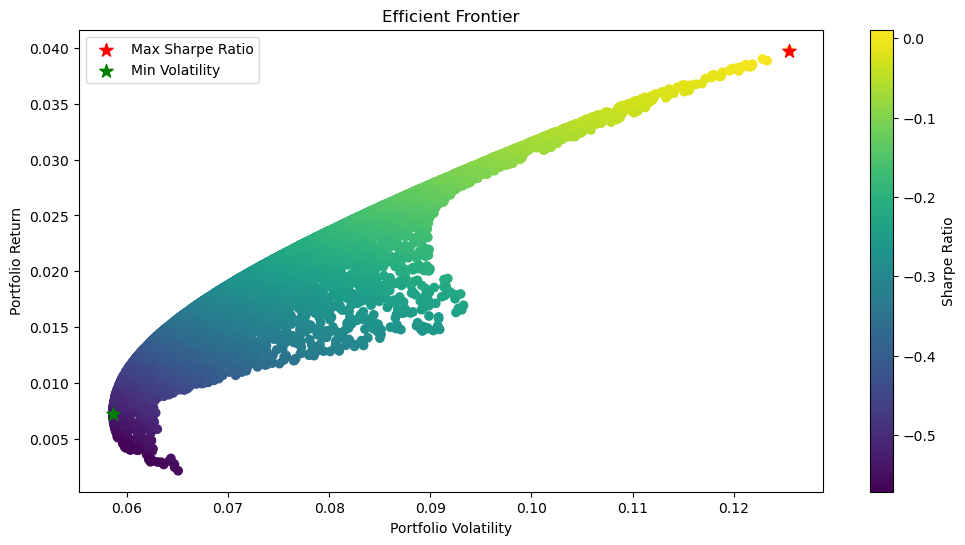

Portfolio with Max Sharpe Ratio:
Expected Return: 0.03975348508738969
Volatility: 0.12550328042723502
Weights: [0.97632435 0.00418112 0.01949453]

Portfolio with Min Volatility:
Expected Return: 0.007236403128437
Volatility: 0.05862545610685598
Weights: [0.05624645 0.71020226 0.23355128]


In [353]:
expected_returns = [0.040395, 0.001806, 0.015764]  # List of expected returns for each stock
var_cov_matrix = np.array([
    [0.016319, 0.002030, 0.004602],
    [0.002030, 0.004286, 0.001270],
    [0.004602, 0.001270, 0.009517]
])
risk_free_rate = Rf

# Number of Monte Carlo simulations
num_simulations = 10000

# Initialize arrays to store results
portfolio_returns = []
portfolio_volatilities = []
weights_list = []

for _ in range(num_simulations):
    # Generate random portfolio weights
    weights = np.random.random(len(expected_returns))
    weights /= np.sum(weights)  # Normalize to ensure they sum to 1
    
    # Calculate portfolio return and volatility
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(var_cov_matrix, weights)))
    
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    weights_list.append(weights)

# Calculate the Sharpe ratio for each portfolio
sharpe_ratios = (np.array(portfolio_returns) - risk_free_rate) / np.array(portfolio_volatilities)

# Find the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)

# Find the portfolio with the minimum volatility
min_volatility_idx = np.argmin(portfolio_volatilities)

# Plot the efficient frontier
plt.figure(figsize=(12, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')

# Highlight the portfolio with maximum Sharpe ratio
plt.scatter(portfolio_volatilities[max_sharpe_idx], portfolio_returns[max_sharpe_idx], marker='*', color='r', s=100, label='Max Sharpe Ratio')

# Highlight the portfolio with minimum volatility
plt.scatter(portfolio_volatilities[min_volatility_idx], portfolio_returns[min_volatility_idx], marker='*', color='g', s=100, label='Min Volatility')

plt.legend()
plt.title('Efficient Frontier')
plt.show()

# Print the weights of the portfolios with maximum Sharpe ratio and minimum volatility
print("Portfolio with Max Sharpe Ratio:")
print("Expected Return:", portfolio_returns[max_sharpe_idx])
print("Volatility:", portfolio_volatilities[max_sharpe_idx])
print("Weights:", weights_list[max_sharpe_idx])

print("\nPortfolio with Min Volatility:")
print("Expected Return:", portfolio_returns[min_volatility_idx])
print("Volatility:", portfolio_volatilities[min_volatility_idx])
print("Weights:", weights_list[min_volatility_idx])

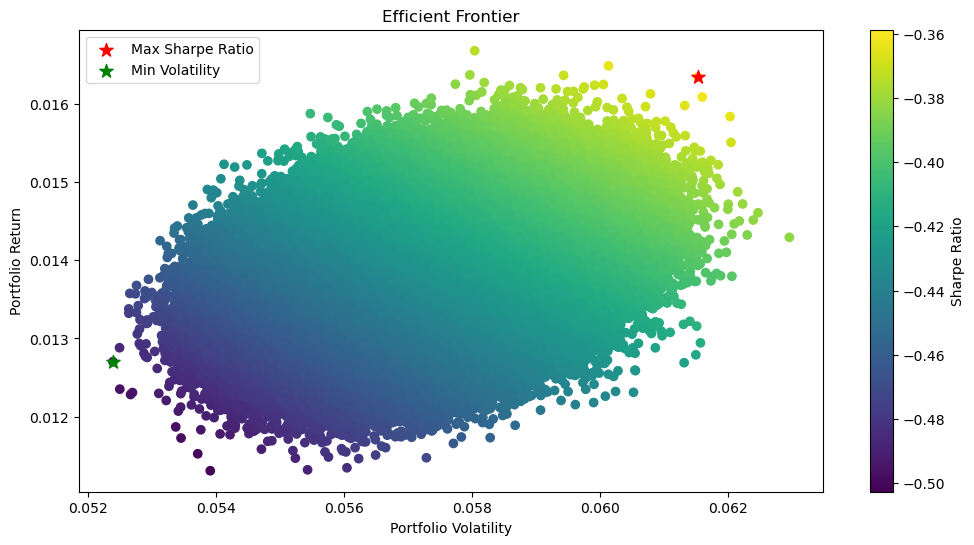

Portfolio with Max Sharpe Ratio:
Expected Return: 0.016342910046336624
Volatility: 0.06152203275474436
Weights: [2.03354492e-02 2.51206166e-02 3.56518767e-03 3.32749369e-02
 1.56433067e-02 2.86984756e-02 1.17260559e-04 1.91592985e-02
 3.14905194e-02 2.27025531e-02 3.24378386e-02 1.16940175e-02
 3.73443295e-03 2.04563277e-02 7.41459782e-03 1.20819014e-02
 8.70257445e-03 2.49342634e-02 3.42883293e-02 3.79975532e-03
 2.07466811e-02 3.27271708e-02 1.47476208e-02 1.84408144e-03
 3.48388846e-03 1.22396954e-02 4.93581173e-03 3.64699446e-03
 4.23391989e-03 2.40805590e-03 1.52870712e-03 3.83818613e-02
 1.03528051e-02 2.09399104e-03 2.88549413e-02 2.02205460e-02
 1.68367086e-03 6.40621871e-03 3.74074226e-02 2.52385064e-02
 1.61920499e-02 6.02500046e-03 3.01222637e-02 1.26841309e-02
 2.49145171e-02 1.12449866e-02 1.14168155e-02 3.66752482e-02
 2.60424832e-02 1.27352829e-03 2.62653095e-02 2.41609857e-02
 6.36362226e-03 2.66384205e-02 1.51426204e-02 1.12667644e-02
 3.19332288e-02 1.55978222e-02 1.1

In [360]:
other = ["^GSPC", "^IRX"]
techstock = ["ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC","QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN"]
finstock = ["AFL", "ALL", "AXP", "AIG", "AMP", "AON", "ACGL", "AJG", "AIZ", "BAC", "WRB", "BLK", "BX", "BK", "BRO", "COF", "CBOE", "SCHW", "CB", "CINF", "C", "CME", "CMA", "DFS", "EG", "FDS", "FITB", "FIS", "FI", "FLT", "BEN", "GL", "GPN", "GS", "HIG", "HBAN", "ICE", "IVZ", "JKHY", "JPM", "KEY", "L", "MTB", "MKTX", "MMC", "MA", "MET", "MCO", "MS", "MSCI", "NDAQ", "NTRS", "PNC", "PFG", "PGR", "PRU", "RJF", "RF", "SPGI", "STT", "TROW", "TRV", "TFC", "USB", "V", "WFC", "WTW", "ZION"]
allasset = techstock+finstock

expected_returns = alldf_[["ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC","QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN"]].mean()
var_cov_matrix = alldf_[["ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC","QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN"]].cov()
risk_free_rate = Rf

# Number of Monte Carlo simulations
num_simulations = 1000000

# Initialize arrays to store results
portfolio_returns = []
portfolio_volatilities = []
weights_list = []

for _ in range(num_simulations):
    # Generate random portfolio weights
    weights = np.random.random(len(expected_returns))
    weights /= np.sum(weights)  # Normalize to ensure they sum to 1
    
    # Calculate portfolio return and volatility
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(var_cov_matrix, weights)))
    
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    weights_list.append(weights)

# Calculate the Sharpe ratio for each portfolio
sharpe_ratios = (np.array(portfolio_returns) - risk_free_rate) / np.array(portfolio_volatilities)

# Find the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)

# Find the portfolio with the minimum volatility
min_volatility_idx = np.argmin(portfolio_volatilities)

# Plot the efficient frontier
plt.figure(figsize=(12, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')

# Highlight the portfolio with maximum Sharpe ratio
plt.scatter(portfolio_volatilities[max_sharpe_idx], portfolio_returns[max_sharpe_idx], marker='*', color='r', s=100, label='Max Sharpe Ratio')

# Highlight the portfolio with minimum volatility
plt.scatter(portfolio_volatilities[min_volatility_idx], portfolio_returns[min_volatility_idx], marker='*', color='g', s=100, label='Min Volatility')

plt.legend()
plt.title('Efficient Frontier')
plt.show()

# Print the weights of the portfolios with maximum Sharpe ratio and minimum volatility
print("Portfolio with Max Sharpe Ratio:")
print("Expected Return:", portfolio_returns[max_sharpe_idx])
print("Volatility:", portfolio_volatilities[max_sharpe_idx])
print("Weights:", weights_list[max_sharpe_idx])

print("\nPortfolio with Min Volatility:")
print("Expected Return:", portfolio_returns[min_volatility_idx])
print("Volatility:", portfolio_volatilities[min_volatility_idx])
print("Weights:", weights_list[min_volatility_idx])

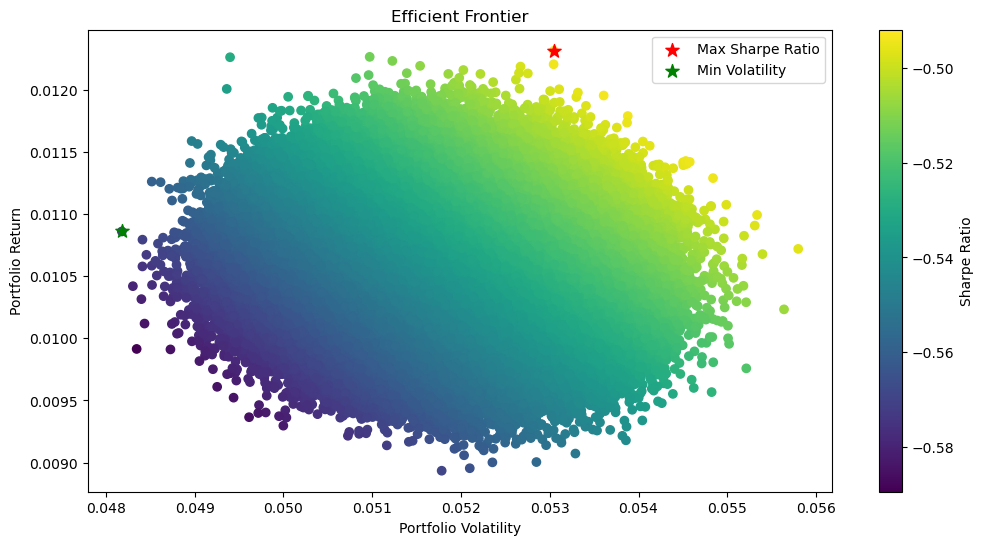

Portfolio with Max Sharpe Ratio:
Expected Return: 0.012314480479997404
Volatility: 0.05304659179003167
Weights: [0.01483903 0.01567697 0.00113435 0.01581338 0.00263582 0.01001982
 0.0031955  0.00784884 0.00626184 0.01534597 0.0167301  0.01188472
 0.0065544  0.01608355 0.00246279 0.00719347 0.00129598 0.0136003
 0.003082   0.0107621  0.01457044 0.00044763 0.01382661 0.00748559
 0.0024522  0.00103722 0.01099262 0.00728599 0.00306725 0.00383749
 0.00421917 0.0125582  0.0113073  0.01675432 0.0070443  0.00424496
 0.00396968 0.00585731 0.00738728 0.00424921 0.01640868 0.00664622
 0.01453132 0.00292627 0.00204703 0.00605478 0.00729879 0.00623537
 0.01666737 0.00606847 0.00701775 0.00349638 0.01061494 0.01357403
 0.00781514 0.01692545 0.00966516 0.00685328 0.0034117  0.01038411
 0.00810785 0.01365951 0.01008928 0.01475044 0.00357941 0.00063109
 0.00898623 0.00996989 0.01100948 0.01014407 0.00768496 0.01339112
 0.016408   0.00507796 0.01381055 0.01688417 0.00408641 0.01596424
 0.00751534 0.0034

In [361]:

techstock = ["ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC","QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN"]
finstock = ["AFL", "ALL", "AXP", "AIG", "AMP", "AON", "ACGL", "AJG", "AIZ", "BAC", "WRB", "BLK", "BX", "BK", "BRO", "COF", "CBOE", "SCHW", "CB", "CINF", "C", "CME", "CMA", "DFS", "EG", "FDS", "FITB", "FIS", "FI", "FLT", "BEN", "GL", "GPN", "GS", "HIG", "HBAN", "ICE", "IVZ", "JKHY", "JPM", "KEY", "L", "MTB", "MKTX", "MMC", "MA", "MET", "MCO", "MS", "MSCI", "NDAQ", "NTRS", "PNC", "PFG", "PGR", "PRU", "RJF", "RF", "SPGI", "STT", "TROW", "TRV", "TFC", "USB", "V", "WFC", "WTW", "ZION"]

expected_returns = alldf_[["ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC","QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN", "AFL", "ALL", "AXP", "AIG", "AMP", "AON", "ACGL", "AJG", "AIZ", "BAC", "WRB", "BLK", "BX", "BK", "BRO", "COF", "CBOE", "SCHW", "CB", "CINF", "C", "CME", "CMA", "DFS", "EG", "FDS", "FITB", "FIS", "FI", "FLT", "BEN", "GL", "GPN", "GS", "HIG", "HBAN", "ICE", "IVZ", "JKHY", "JPM", "KEY", "L", "MTB", "MKTX", "MMC", "MA", "MET", "MCO", "MS", "MSCI", "NDAQ", "NTRS", "PNC", "PFG", "PGR", "PRU", "RJF", "RF", "SPGI", "STT", "TROW", "TRV", "TFC", "USB", "V", "WFC", "WTW", "ZION"]].mean()
var_cov_matrix = alldf_[["ACN", "ADBE", "AKAM", "AMD", "APH", "ADI", "ANSS", "AAPL", "AMAT", "ADSk", "AVGO", "CDNS", "CDW", "CSCO", "CTSH", "GLW", "DXC", "ENPH", "EPAM", "FFIV", "FICO", "FSLR", "FTNT", "IT", "GEN", "HPQ", "IBM", "INTC", "INTU", "JNPR", "KLAC", "LRCX", "MCHP", "MU", "MSFT", "MPWR", "MSI", "NTAP", "NVDA", "NXPI", "ON", "ORCL", "PANW", "PTC","QCOM", "ROP", "CRM", "STX", "NOW", "SWKS", "SNPS", "TEL", "TDY", "TER", "TXN", "TRMB", "TYL", "VRSN", "WDC", "ZBRA", "GOOGL", "META", "AMZN", "AFL", "ALL", "AXP", "AIG", "AMP", "AON", "ACGL", "AJG", "AIZ", "BAC", "WRB", "BLK", "BX", "BK", "BRO", "COF", "CBOE", "SCHW", "CB", "CINF", "C", "CME", "CMA", "DFS", "EG", "FDS", "FITB", "FIS", "FI", "FLT", "BEN", "GL", "GPN", "GS", "HIG", "HBAN", "ICE", "IVZ", "JKHY", "JPM", "KEY", "L", "MTB", "MKTX", "MMC", "MA", "MET", "MCO", "MS", "MSCI", "NDAQ", "NTRS", "PNC", "PFG", "PGR", "PRU", "RJF", "RF", "SPGI", "STT", "TROW", "TRV", "TFC", "USB", "V", "WFC", "WTW", "ZION"]].cov()
risk_free_rate = Rf

# Number of Monte Carlo simulations
num_simulations = 1000000

# Initialize arrays to store results
portfolio_returns = []
portfolio_volatilities = []
weights_list = []

for _ in range(num_simulations):
    # Generate random portfolio weights
    weights = np.random.random(len(expected_returns))
    weights /= np.sum(weights)  # Normalize to ensure they sum to 1
    
    # Calculate portfolio return and volatility
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(var_cov_matrix, weights)))
    
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    weights_list.append(weights)

# Calculate the Sharpe ratio for each portfolio
sharpe_ratios = (np.array(portfolio_returns) - risk_free_rate) / np.array(portfolio_volatilities)

# Find the portfolio with the highest Sharpe ratio
max_sharpe_idx = np.argmax(sharpe_ratios)

# Find the portfolio with the minimum volatility
min_volatility_idx = np.argmin(portfolio_volatilities)

# Plot the efficient frontier
plt.figure(figsize=(12, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Return')

# Highlight the portfolio with maximum Sharpe ratio
plt.scatter(portfolio_volatilities[max_sharpe_idx], portfolio_returns[max_sharpe_idx], marker='*', color='r', s=100, label='Max Sharpe Ratio')

# Highlight the portfolio with minimum volatility
plt.scatter(portfolio_volatilities[min_volatility_idx], portfolio_returns[min_volatility_idx], marker='*', color='g', s=100, label='Min Volatility')

plt.legend()
plt.title('Efficient Frontier')
plt.show()

# Print the weights of the portfolios with maximum Sharpe ratio and minimum volatility
print("Portfolio with Max Sharpe Ratio:")
print("Expected Return:", portfolio_returns[max_sharpe_idx])
print("Volatility:", portfolio_volatilities[max_sharpe_idx])
print("Weights:", weights_list[max_sharpe_idx])

print("\nPortfolio with Min Volatility:")
print("Expected Return:", portfolio_returns[min_volatility_idx])
print("Volatility:", portfolio_volatilities[min_volatility_idx])
print("Weights:", weights_list[min_volatility_idx])

# Copula 
## fitting
##

In [240]:
import copulas

In [310]:
from copulas.univariate import Univariate

for model in ["META", "NVDA", "IBM", "^GSPC"]:
    print(model)
    data = alldf_[model]
    univariate = Univariate()
    univariate.fit(data)
    print(univariate.to_dict())
    print("\n")

META
{'df': 3.8796492780942393, 'loc': 0.020287003542427136, 'scale': 0.06910480492373568, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}


NVDA
{'df': 6.360901185879122, 'loc': 0.04549357329398934, 'scale': 0.10665464633367275, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}


IBM
{'df': 5.612079921730301, 'loc': 0.0028769702143163316, 'scale': 0.052624057088036705, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}


^GSPC
{'df': 4.901685987419036, 'loc': 0.01038672952909566, 'scale': 0.03425012741027357, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}




META


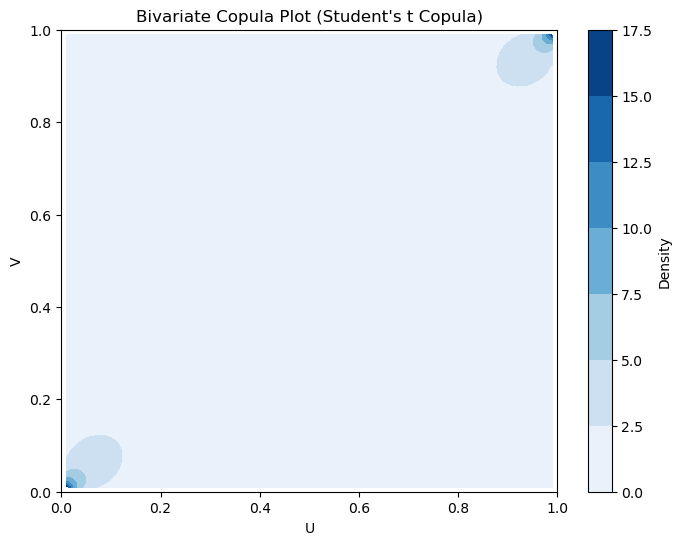



NVDA


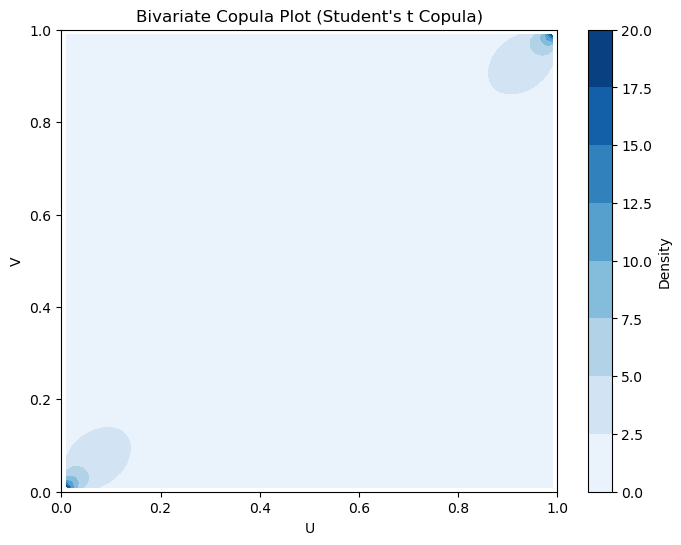



IBM


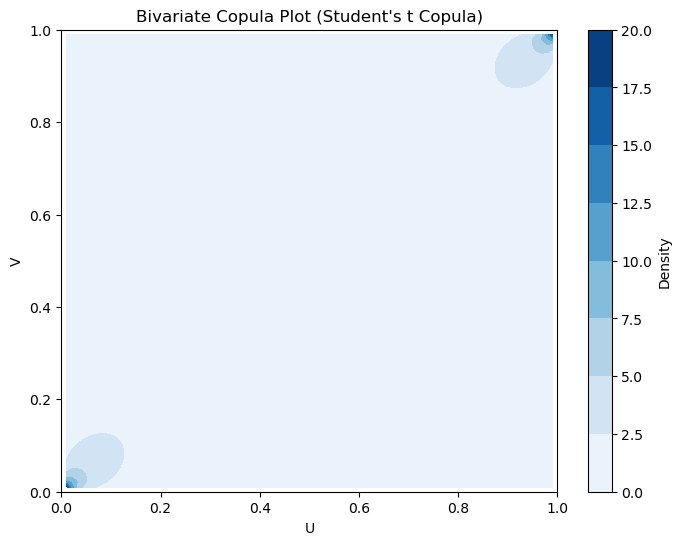

In [312]:
for model in ["META", "NVDA", "IBM"]:
    print(model)
    u = alldf_["^GSPC"]
    v = alldf_[model]

    # Fit a Student's t copula to the data
    copula = StudentCopula(dim=2)
    copula.fit(np.column_stack((u, v)))
    
    # Create a grid for the copula plot
    u_grid, v_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    copula_density = copula.pdf(np.column_stack((u_grid.ravel(), v_grid.ravel())))
    copula_density = copula_density.reshape((100, 100))

    # Create a bivariate copula plot
    plt.figure(figsize=(8, 6))
    plt.contourf(u_grid, v_grid, copula_density, cmap='Blues')
    plt.colorbar(label='Density')
    plt.xlabel('U')
    plt.ylabel('V')
    plt.title("Bivariate Copula Plot (Student's t Copula)")
    plt.show()

    print("\n")

NVDA


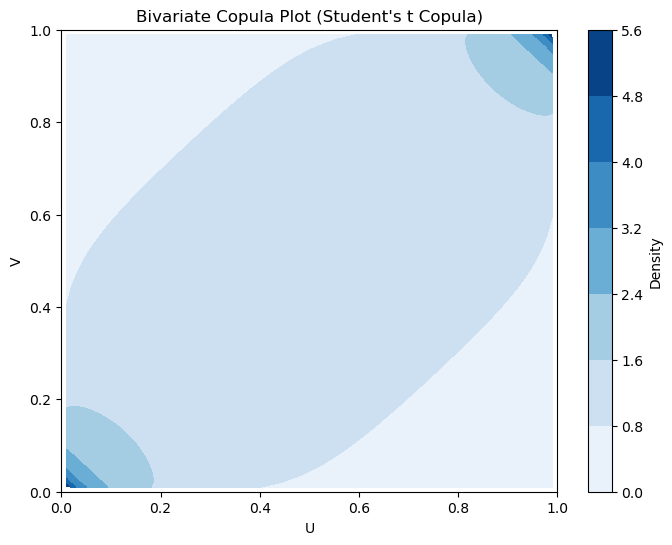



IBM


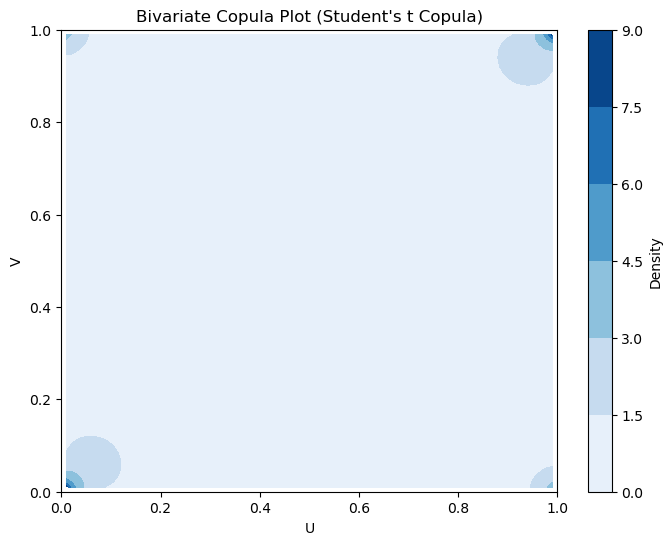

In [313]:
for model in ["NVDA", "IBM"]:
    print(model)
    u = alldf_["META"]
    v = alldf_[model]

    # Fit a Student's t copula to the data
    copula = StudentCopula(dim=2)
    copula.fit(np.column_stack((u, v)))
    
    # Create a grid for the copula plot
    u_grid, v_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
    copula_density = copula.pdf(np.column_stack((u_grid.ravel(), v_grid.ravel())))
    copula_density = copula_density.reshape((100, 100))

    # Create a bivariate copula plot
    plt.figure(figsize=(8, 6))
    plt.contourf(u_grid, v_grid, copula_density, cmap='Blues')
    plt.colorbar(label='Density')
    plt.xlabel('U')
    plt.ylabel('V')
    plt.title("Bivariate Copula Plot (Student's t Copula)")
    plt.show()

    print("\n")

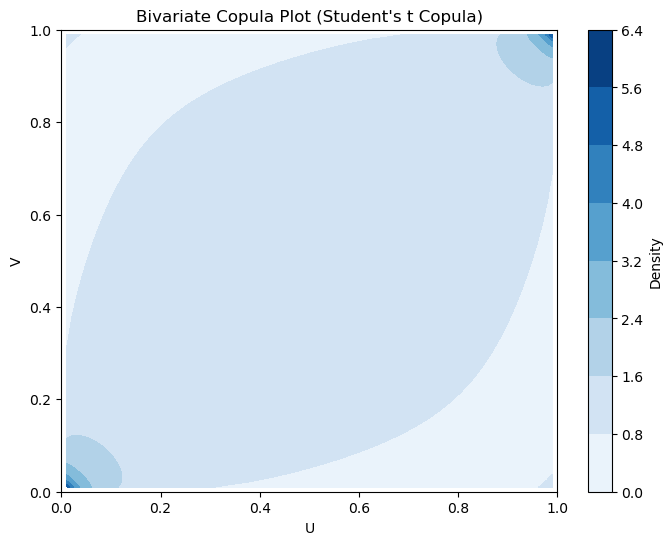

In [314]:
u = alldf_["NVDA"]
v = alldf_["IBM"]

# Fit a Student's t copula to the data
copula = StudentCopula(dim=2)
copula.fit(np.column_stack((u, v)))
    
# Create a grid for the copula plot
u_grid, v_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
copula_density = copula.pdf(np.column_stack((u_grid.ravel(), v_grid.ravel())))
copula_density = copula_density.reshape((100, 100))

# Create a bivariate copula plot
plt.figure(figsize=(8, 6))
plt.contourf(u_grid, v_grid, copula_density, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('U')
plt.ylabel('V')
plt.title("Bivariate Copula Plot (Student's t Copula)")
plt.show()

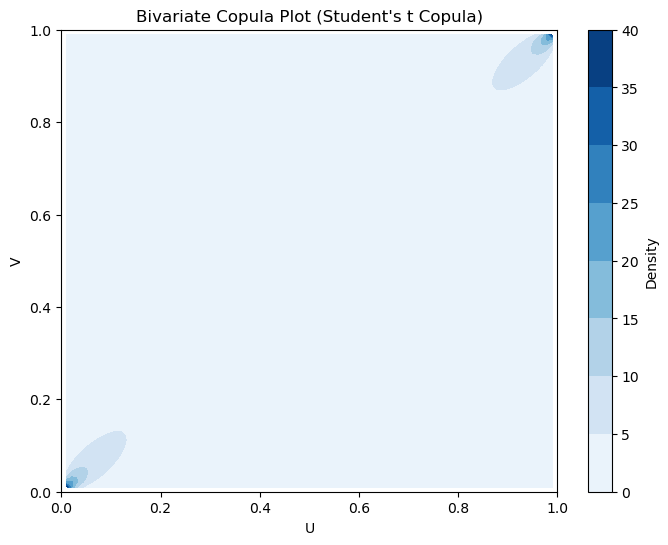

In [324]:
u = alldf_["^GSPC"]
v = alldf_["techmean"]

# Fit a Student's t copula to the data
copula = StudentCopula(dim=2)
copula.fit(np.column_stack((u, v)))
    
# Create a grid for the copula plot
u_grid, v_grid = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
copula_density = copula.pdf(np.column_stack((u_grid.ravel(), v_grid.ravel())))
copula_density = copula_density.reshape((100, 100))

# Create a bivariate copula plot
plt.figure(figsize=(8, 6))
plt.contourf(u_grid, v_grid, copula_density, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('U')
plt.ylabel('V')
plt.title("Bivariate Copula Plot (Student's t Copula)")
plt.show()